In [1]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,vertical_flip=True)

In [3]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [4]:
x_train=train_datagen.flow_from_directory(r"F:\dataset\Digital Naturalist Dataset\train",target_size=(64,64),batch_size=32,class_mode="categorical")

Found 138 images belonging to 3 classes.


In [5]:
x_test=train_datagen.flow_from_directory(r"F:\dataset\Digital Naturalist Dataset\test",target_size=(64,64),batch_size=32,class_mode="categorical")

Found 138 images belonging to 3 classes.


In [6]:
x_train.class_indices

{'Bird': 0, 'Flower': 1, 'Mammal': 2}

In [7]:
x_test.class_indices

{'Bird': 0, 'Flower': 1, 'Mammal': 2}

In [8]:
model=Sequential()

In [9]:
model.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation='relu'))

In [10]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [11]:
model.add(Flatten())

In [12]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [13]:
model.add(Dense(units=300,kernel_initializer="random_uniform",activation='relu'))

In [14]:
model.add(Dense(units=200,kernel_initializer="random_uniform",activation='relu'))

In [15]:
model.add(Dense(units=3,kernel_initializer="random_uniform",activation='softmax'))

In [16]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [17]:
model.fit_generator(x_train,steps_per_epoch=4,epochs=25,validation_data=x_test,validation_steps=10)

C:\Users\admin\AppData\Local\Temp\ipykernel_5904\3933243730.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(x_train,steps_per_epoch=4,epochs=25,validation_data=x_test,validation_steps=10)


Epoch 1/25
4/4 [==============================] - 3s 810ms/step - loss: 1.4022 - accuracy: 0.3113 - val_loss: 1.1004 - val_accuracy: 0.3116
Epoch 2/25
4/4 [==============================] - 1s 180ms/step - loss: 1.1462 - accuracy: 0.3208
Epoch 3/25
4/4 [==============================] - 1s 208ms/step - loss: 1.0737 - accuracy: 0.3679
Epoch 4/25
4/4 [==============================] - 1s 176ms/step - loss: 1.0177 - accuracy: 0.4623
Epoch 5/25
4/4 [==============================] - 1s 175ms/step - loss: 0.9864 - accuracy: 0.5000
Epoch 6/25
4/4 [==============================] - 1s 193ms/step - loss: 0.8835 - accuracy: 0.5938
Epoch 7/25
4/4 [==============================] - 1s 180ms/step - loss: 0.7876 - accuracy: 0.6132
Epoch 8/25
4/4 [==============================] - 1s 172ms/step - loss: 0.8808 - accuracy: 0.5566
Epoch 9/25
4/4 [==============================] - 1s 193ms/step - loss: 0.7368 - accuracy: 0.6406
Epoch 10/25
4/4 [==============================] - 1s 170ms/step - loss: 0.6

In [18]:
model.save("flora&fauna.h5")

In [19]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

In [20]:
model=load_model("flora&fauna.h5")

In [21]:
img=image.load_img(r"F:\Corpse Flower.jpg",target_size=(64,64))

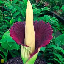

In [22]:
img

In [23]:
type(img)

PIL.Image.Image

In [24]:
x=image.img_to_array(img)

In [25]:
x.shape

(64, 64, 3)

In [26]:
x=np.expand_dims(x,axis=0)

In [27]:
x.shape

(1, 64, 64, 3)

In [28]:
pred_prob=model.predict(x)

1/1 [==============================] - 0s 110ms/step


In [29]:
pred_prob

array([[0., 1., 0.]], dtype=float32)

In [30]:
class_name=["Bird","Flower","Mammal"]

In [31]:
pred_id=pred_prob.argmax(axis=1)[0]

In [32]:
pred_id

1

In [33]:
print("predicted  is",str(class_name[pred_id]))

predicted  is Flower
